# YOLOv8 Tutorial
<div>
    <a href="https://colab.research.google.com/drive/1bNCDlriyChpLlNQvIjPkLsi92X4VzWIr?usp=sharing"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
</div>
<br>

YOLOv8 is a computer vision model built by Ultralytics which support object detection, classification, key-point detection, and segmentation tasks.

In this tutorial we will use the model trained on the Microsoft COCO dataset and ImageNet.

## Useful links
* [YOLOv8 repository](https://github.com/ultralytics/ultralytics)
* [YOLOv8 documentation](https://docs.ultralytics.com/es)
* [Prediction output](https://docs.ultralytics.com/es/modes/predict/)

## Setup 🔧

In [1]:
# Check the GPU
!nvidia-smi

Fri Feb 23 14:36:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
%pip install ultralytics

from ultralytics import YOLO
import cv2

# this patch allows to display images in google colab
from google.colab.patches import cv2_imshow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.0/716.0 kB 4.2 MB/s eta 0:00:00


## Object detection
Object detection is a task that identify the location and class of objects in an image or video sequence.

The output of an object detector is a set of bounding boxes that enclose the objects in the image, along with class labels and confidence scores for each box.

The following table shows the performance of the different models for the object detection task.

| Modelo  | tamaño (píxeles) | mAPval50-95 | Velocidad CPU ONNX (ms) | Velocidad A100 TensorRT (ms) | parámetros (M) | FLOPs (B) |
|---------|------------------|-------------|-------------------------|------------------------------|----------------|-----------|
| YOLOv8n | 640              | 37.3        | 80.4                    | 0.99                         | 3.2            | 8.7       |
| YOLOv8s | 640              | 44.9        | 128.4                   | 1.20                         | 11.2           | 28.6      |
| YOLOv8m | 640              | 50.2        | 234.7                   | 1.83                         | 25.9           | 78.9      |
| YOLOv8l | 640              | 52.9        | 375.2                   | 2.39                         | 43.7           | 165.2     |
| YOLOv8x | 640              | 53.9        | 479.1                   | 3.53                         | 68.2           | 257.8     |



0: 448x640 7 persons, 1 bus, 1 train, 1 backpack, 1 handbag, 1 suitcase, 9.8ms
Speed: 1.4ms preprocess, 9.8ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


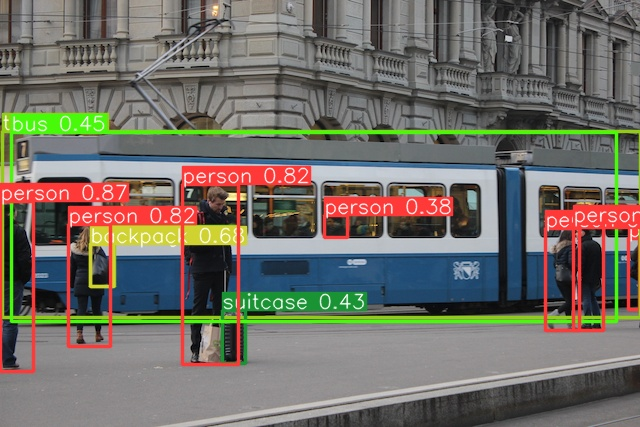

In [6]:
image = cv2.imread('./data/IMG_4121.png')

model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model
results = model(image)      # predict on an image

# Process results list
for result in results:
    boxes = result.boxes          # Boxes object for bounding box outputs
    masks = result.masks          # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs          # Probs object for classification outputs
    result.save(filename='result.jpg')  # save to disk
    cv2_imshow(cv2.imread('result.jpg'))

## Object segmentation
Instance segmentation goes one step beyond object detection and identify the shape of objects in an image.

The output of an instance segmentation model is a set of masks or contours that outline each object in the image, along with class labels and confidence scores for each object.

The following table shows the performance of the different models for the object segmentation task.


| Modelo      | tamaño (píxeles) | mAPbox50-95 | mAPmask50-95 | Velocidad CPU ONNX (ms) | Velocidad A100 TensorRT (ms) | parámetros (M) | FLOPs (B) |
|-------------|------------------|-------------|--------------|-------------------------|------------------------------|----------------|-----------|
| YOLOv8n-seg | 640              | 36.7        | 30.5         | 96.1                    | 1.21                         | 3.4            | 12.6      |
| YOLOv8s-seg | 640              | 44.6        | 36.8         | 155.7                   | 1.47                         | 11.8           | 42.6      |
| YOLOv8m-seg | 640              | 49.9        | 40.8         | 317.0                   | 2.18                         | 27.3           | 110.2     |
| YOLOv8l-seg | 640              | 52.3        | 42.6         | 572.4                   | 2.79                         | 46.0           | 220.5     |
| YOLOv8x-seg | 640              | 53.4        | 43.4         | 712.1                   | 4.02                         | 71.8           | 344.1     |

100%|██████████| 6.73M/6.73M [00:00<00:00, 90.3MB/s]



0: 448x640 10 persons, 1 bus, 1 train, 1 backpack, 1 handbag, 25.5ms
Speed: 2.1ms preprocess, 25.5ms inference, 16.9ms postprocess per image at shape (1, 3, 448, 640)


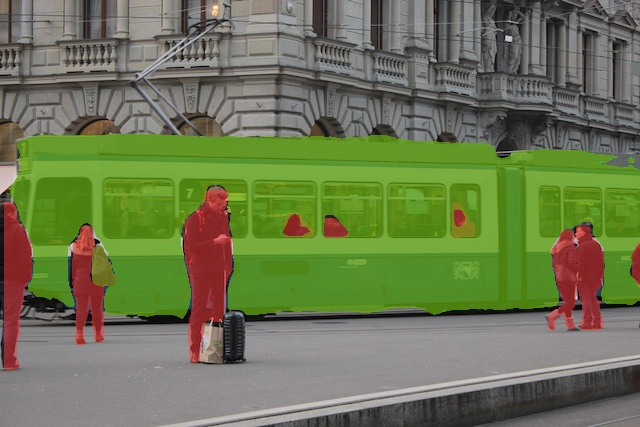

In [7]:
image = cv2.imread('./data/IMG_4121.png')

model = YOLO('yolov8n-seg.pt')  # load a pretrained YOLOv8n segmentation model
results = model(image)          # predict on an image

# Process results list
for result in results:
    boxes = result.boxes          # Boxes object for bounding box outputs
    masks = result.masks          # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs          # Probs object for classification outputs
    result.save(filename='result.jpg', boxes=False)  # save to disk
    cv2_imshow(cv2.imread('result.jpg'))

## Image classification
Image classification is the simplest of the three tasks and involves classifying an entire image into one of a set of predefined classes.

The output of an image classifier is a single class label and a confidence score.

The following table shows the performance of the different models for the image classification task.

| Modelo      | tamaño (píxeles) | acc top1 | acc top5 | Velocidad CPU ONNX (ms) | Velocidad A100 TensorRT (ms) | parámetros (M) | FLOPs (B) a 640 |
|-------------|------------------|----------|----------|-------------------------|------------------------------|----------------|-----------------|
| YOLOv8n-cls | 224              | 69.0     | 88.3     | 12.9                    | 0.31                         | 2.7            | 4.3             |
| YOLOv8s-cls | 224              | 73.8     | 91.7     | 23.4                    | 0.35                         | 6.4            | 13.5            |
| YOLOv8m-cls | 224              | 76.8     | 93.5     | 85.4                    | 0.62                         | 17.0           | 42.7            |
| YOLOv8l-cls | 224              | 76.8     | 93.5     | 163.0                   | 0.87                         | 37.5           | 99.7            |
| YOLOv8x-cls | 224              | 79.0     | 94.6     | 232.0                   | 1.01                         | 57.4           | 154.8           |

In [8]:
image = cv2.imread('./data/IMG_4121.png')

model = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model
results = model(image)          # predict on an image

probs = results[0].probs        # Probs object for classification outputs

top5names = [results[0].names[i] for i in probs.top5]
top5probs = probs.top5conf.cpu().numpy()

print(top5names)
print(top5probs)

100%|██████████| 5.30M/5.30M [00:00<00:00, 66.5MB/s]



0: 224x224 streetcar 0.98, trolleybus 0.02, minibus 0.00, passenger_car 0.00, bullet_train 0.00, 3.5ms
Speed: 48.8ms preprocess, 3.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
['streetcar', 'trolleybus', 'minibus', 'passenger_car', 'bullet_train']
[    0.98281    0.015205   0.0015782  0.00015398  0.00012275]


## Pose estimation
Pose estimation is a task of identifying the location of specific points in an image, usually called keypoints. Keypoints can represent various parts of the object, such as joints, landmarks, or other distinctive features. Keypoint locations are typically represented as a set of 2D [x, y] or 3D [x, y, visible] coordinates.

The output of a pose estimation model is a set of points that represent the key points of an object in the image, usually along with the confidence scores for each point.

The following table shows the performance of the different models for the pose estimation task.

| Modelo          | tamaño (píxeles) | mAPpose50-95 | mAPpose50 | Velocidad CPU ONNX (ms) | Velocidad A100 TensorRT (ms) | parámetros (M) | FLOPs (B) |
|-----------------|------------------|--------------|-----------|-------------------------|------------------------------|----------------|-----------|
| YOLOv8n-pose    | 640              | 50.4         | 80.1      | 131.8                   | 1.18                         | 3.3            | 9.2       |
| YOLOv8s-pose    | 640              | 60.0         | 86.2      | 233.2                   | 1.42                         | 11.6           | 30.2      |
| YOLOv8m-pose    | 640              | 65.0         | 88.8      | 456.3                   | 2.00                         | 26.4           | 81.0      |
| YOLOv8l-pose    | 640              | 67.6         | 90.0      | 784.5                   | 2.59                         | 44.4           | 168.6     |
| YOLOv8x-pose    | 640              | 69.2         | 90.2      | 1607.1                  | 3.73                         | 69.4           | 263.2     |
| YOLOv8x-pose-p6 | 1280             | 71.6         | 91.2      | 4088.7                  | 10.04                        | 99.1           | 1066.4    |

100%|██████████| 6.51M/6.51M [00:00<00:00, 81.6MB/s]



0: 448x640 5 persons, 26.3ms
Speed: 1.3ms preprocess, 26.3ms inference, 35.7ms postprocess per image at shape (1, 3, 448, 640)


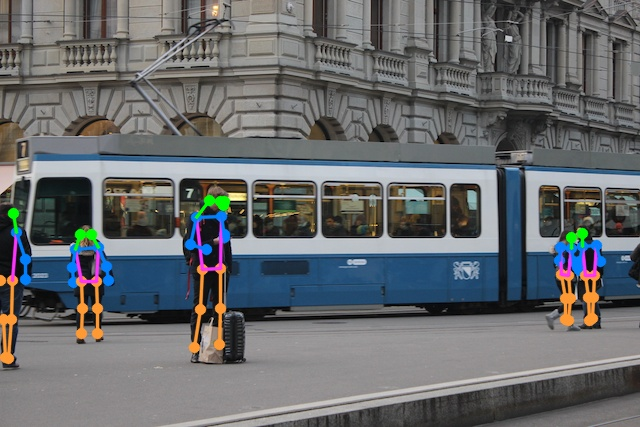

In [9]:
image = cv2.imread('./data/IMG_4121.png')

model = YOLO('yolov8n-pose.pt')   # load a pretrained YOLOv8n classification model
results = model(image)            # predict on an image

# Process results list
for result in results:
    boxes = result.boxes          # Boxes object for bounding box outputs
    masks = result.masks          # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs          # Probs object for classification outputs
    result.save(filename='result.jpg', boxes=False)  # save to disk
    cv2_imshow(cv2.imread('result.jpg'))